In [1]:
import matplotlib.cm as cm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_excel(r'data/trainer_table_S1.xlsx')

In [6]:
data

,Ls,Sol,TID,Fp,CO2,CO2_err,Ar,Ar_err,N2,N2_err,O2,O2_err+,O2_err-,CO,CO_err
0,175.59,45.95,25012,0.8952,0.948,0.001,0.0210,0.0004,0.0283,0.0009,0.00163,0.00015,0.00016,0.000813,0.00005
1,194.36,77.91,25027,0.9324,0.949,0.001,0.0207,0.0003,0.0277,0.0006,0.00176,0.00005,0.00004,0.000721,0.00006
2,320.79,278.58,25084,1.0107,0.954,0.001,0.0187,0.0003,0.0255,0.0006,0.00134,0.00005,0.00002,0.000623,0.00003
3,324.50,284.99,25088,1.0106,0.954,0.001,0.0188,0.0003,0.0253,0.0006,0.00128,0.00012,0.00005,0.000559,0.00002
4,328.58,292.13,25095,1.0052,0.954,0.001,0.0192,0.0003,0.0250,0.0006,0.00129,0.00005,0.00007,0.000536,0.00009
5,344.94,321.70,25106,0.9949,0.952,0.001,0.0195,0.0003,0.0264,0.0006,0.00153,0.00003,0.00014,0.000570,0.00003
6,40.91,434.91,25150,1.0573,0.954,0.001,0.0192,0.0003,0.0253,0.0006,0.00137,0.00004,0.00012,0.000449,0.00003
7,87.89,538.97,25172,1.0208,0.954,0.001,0.0192,0.0003,0.0251,0.0006,0.00165,0.00004,0.00009,0.000423,0.00002
8,134.69,638.08,25195,0.8900,0.951,0.001,0.0200,0.0004,0.0262,0.0006,0.00175,0.00004,0.00016,0.000461,0.00012
9,198.87,753.97,25217,0.9479,0.949,0.001,0.0211,0.0004,0.0279,0.0006,0.00180,0.00005,0.00003,0.000636,0.00003


### Get data 

In [3]:
sol = [row[1] for (index, row) in data.iterrows()]

In [4]:
x = [row[0] for (index, row) in data.iterrows()]

In [5]:
CO2 = [row[4] for (index, row) in data.iterrows()]
CO2_std = [row[5] for (index, row) in data.iterrows()]

Ar = [row[6] for (index, row) in data.iterrows()]
Ar_std = [row[7] for (index, row) in data.iterrows()]

N2 = [row[8] for (index, row) in data.iterrows()]
N2_std = [row[9] for (index, row) in data.iterrows()]

O2 = [row[10] for (index, row) in data.iterrows()]
O2_std_plus = [row[11] for (index, row) in data.iterrows()]
O2_std_minus = [row[12] for (index, row) in data.iterrows()]

CO = [row[13] for (index, row) in data.iterrows()]
CO_std = [row[14] for (index, row) in data.iterrows()]

In [6]:
# get the extended arr incuding all the info: x, y and std
ex_x = [e + 360 for e in x]
ex_CO2_arr = [e for e in zip(ex_x, CO2, CO2_std) if e[0] <= 540]
ex_Ar_arr = [e for e in zip(ex_x, Ar, Ar_std) if e[0] <= 540]
ex_N2_arr = [e for e in zip(ex_x, N2, N2_std) if e[0] <= 540]
ex_O2_arr = [e for e in zip(ex_x, O2, O2_std_plus, O2_std_minus) if e[0] <= 540]
ex_CO_arr = [e for e in zip(ex_x, CO, CO_std) if e[0] <= 540]

In [7]:
n_ex_x = [e[0] for e in ex_CO2_arr]
ex_CO2 = [e[1] for e in ex_CO2_arr]
ex_Ar = [e[1] for e in ex_Ar_arr]
ex_N2 = [e[1] for e in ex_N2_arr]
ex_O2 = [e[1] for e in ex_O2_arr]
ex_CO = [e[1] for e in ex_CO_arr]

In [60]:
# std
ex_CO_err = [e[2] for e in ex_CO_arr]
ex_O2_plus = [e[2] for e in ex_O2_arr]
ex_O2_minus = [e[3] for e in ex_O2_arr]
ex_N2_err = [e[2] for e in ex_N2_arr]

n_CO_err = CO_std + ex_CO_err
n_O2_plus = O2_std_plus + ex_O2_plus
n_O2_minus = O2_std_minus + ex_O2_minus
n_N2_err = N2_std + ex_N2_err

In [8]:
n_x = x + n_ex_x # x
n_CO2 = CO2 + ex_CO2
n_Ar = Ar + ex_Ar
n_N2 = N2 + ex_N2
n_O2 = O2 + ex_O2
n_CO = CO + ex_CO

### Set up legends: MY

In [9]:
legend_31 = [row for (index, row) in data.iterrows() if 45.95 <= row[1] <= 321.74]
legend_32 = [row for (index, row) in data.iterrows() if 434.88 <= row[1] <= 830.94]
legend_33 = [row for (index, row) in data.iterrows() if 1145.96 <= row[1] <= 1600.07]
legend_34 = [row for (index, row) in data.iterrows() if 1711.06 <= row[1] <= 1869.07]

In [62]:
# MY 31
x_31 = [e[0] for e in legend_31]
Ar_31 = [e[6] for e in legend_31]
N2_31 = [e[8] for e in legend_31]
O2_31 = [e[10] for e in legend_31]
CO_31 = [e[13] for e in legend_31]
#std
CO_31_std = [e[14] for e in legend_31]
O2_31_std_plus = [e[11] for e in legend_31]
O2_31_std_minus = [e[12] for e in legend_31]
N2_31_std = [e[9] for e in legend_31]
Ar_31_std = [e[7] for e in legend_31]

# MY 32
x_32 = [e[0] for e in legend_32]
Ar_32 = [e[6] for e in legend_32]
N2_32 = [e[8] for e in legend_32]
O2_32 = [e[10] for e in legend_32]
CO_32 = [e[13] for e in legend_32]
#std
CO_32_std = [e[14] for e in legend_32]
O2_32_std_plus = [e[11] for e in legend_32]
O2_32_std_minus = [e[12] for e in legend_32]
N2_32_std = [e[9] for e in legend_32]
Ar_32_std = [e[7] for e in legend_32]

# MY 33
x_33 = [e[0] for e in legend_33]
Ar_33 = [e[6] for e in legend_33]
N2_33 = [e[8] for e in legend_33]
O2_33 = [e[10] for e in legend_33]
CO_33 = [e[13] for e in legend_33]
#std
CO_33_std = [e[14] for e in legend_33]
O2_33_std_plus = [e[11] for e in legend_33]
O2_33_std_minus = [e[12] for e in legend_33]
N2_33_std = [e[9] for e in legend_33]
Ar_33_std = [e[7] for e in legend_33]

# MY 34
x_34 = [e[0] for e in legend_34]
Ar_34 = [e[6] for e in legend_34]
N2_34 = [e[8] for e in legend_34]
O2_34 = [e[10] for e in legend_34]
CO_34 = [e[13] for e in legend_34]
#std
CO_34_std = [e[14] for e in legend_34]
O2_34_std_plus = [e[11] for e in legend_34]
O2_34_std_minus = [e[12] for e in legend_34]
N2_34_std = [e[9] for e in legend_34]
Ar_34_std = [e[7] for e in legend_34]

In [74]:
# MY 34
ex_x_31 = [e + 360 for e in x_31]
n_ex_x31 = [e[0] for e in zip(ex_x_31, Ar_31) if e[0] <= 540]
ex31_CO_arr = [e for e in zip(ex_x_31, CO_31, CO_31_std) if e[0] <= 540]
ex31_Ar_arr = [e for e in zip(ex_x_31, Ar_31, Ar_31_std) if e[0] <= 540]
ex31_N2_arr = [e for e in zip(ex_x_31, N2_31, N2_31_std) if e[0] <= 540]
ex31_O2_arr = [e for e in zip(ex_x_31, O2_31, O2_31_std_plus, O2_31_std_minus) if e[0] <= 540]
ex31_CO_arr = [e for e in zip(ex_x_31, CO_31, CO_31_std) if e[0] <= 540]
#data
ex_CO_31 = [e[1] for e in ex31_CO_arr]
ex_Ar_31 = [e[1] for e in ex31_Ar_arr]
ex_N2_31 = [e[1] for e in ex31_N2_arr]
ex_O2_31 = [e[1] for e in ex31_O2_arr]
ex_CO_31 = [e[1] for e in ex31_CO_arr]
#std
ex31_CO_err = [e[2] for e in ex31_CO_arr]
ex31_O2_plus = [e[2] for e in ex31_O2_arr]
ex31_O2_minus = [e[3] for e in ex31_O2_arr]
ex31_N2_err = [e[2] for e in ex31_N2_arr]
ex31_Ar_err = [e[2] for e in ex31_Ar_arr]
n31_Ar_err = Ar_31_std + ex31_Ar_err
n31_CO_err = CO_31_std + ex31_CO_err
n31_O2_plus = O2_31_std_plus + ex31_O2_plus
n31_O2_minus = O2_31_std_minus + ex31_O2_minus
n31_N2_err = N2_31_std + ex31_N2_err

# MY 32
ex_x_32 = [e + 360 for e in x_32]
n_ex_x32 = [e[0] for e in zip(ex_x_32, Ar_32) if e[0] <= 540]
ex32_CO_arr = [e for e in zip(ex_x_32, CO_32, CO_32_std) if e[0] <= 540]
ex32_Ar_arr = [e for e in zip(ex_x_32, Ar_32, Ar_32_std) if e[0] <= 540]
ex32_N2_arr = [e for e in zip(ex_x_32, N2_32, N2_32_std) if e[0] <= 540]
ex32_O2_arr = [e for e in zip(ex_x_32, O2_32, O2_32_std_plus, O2_32_std_minus) if e[0] <= 540]
ex32_CO_arr = [e for e in zip(ex_x_32, CO_32, CO_32_std) if e[0] <= 540]
#data
ex_CO_32 = [e[1] for e in ex32_CO_arr]
ex_Ar_32 = [e[1] for e in ex32_Ar_arr]
ex_N2_32 = [e[1] for e in ex32_N2_arr]
ex_O2_32 = [e[1] for e in ex32_O2_arr]
ex_CO_32 = [e[1] for e in ex32_CO_arr]
#std
ex32_CO_err = [e[2] for e in ex32_CO_arr]
ex32_O2_plus = [e[2] for e in ex32_O2_arr]
ex32_O2_minus = [e[3] for e in ex32_O2_arr]
ex32_N2_err = [e[2] for e in ex32_N2_arr]
ex32_Ar_err = [e[2] for e in ex32_Ar_arr]
n32_Ar_err = Ar_32_std + ex32_Ar_err
n32_CO_err = CO_32_std + ex32_CO_err
n32_O2_plus = O2_32_std_plus + ex32_O2_plus
n32_O2_minus = O2_32_std_minus + ex32_O2_minus
n32_N2_err = N2_32_std + ex32_N2_err

# MY 33
ex_x_33 = [e + 360 for e in x_33]
n_ex_x33 = [e[0] for e in zip(ex_x_33, Ar_33) if e[0] <= 540]
ex33_CO_arr = [e for e in zip(ex_x_33, CO_33, CO_33_std) if e[0] <= 540]
ex33_Ar_arr = [e for e in zip(ex_x_33, Ar_33, Ar_33_std) if e[0] <= 540]
ex33_N2_arr = [e for e in zip(ex_x_33, N2_33, N2_33_std) if e[0] <= 540]
ex33_O2_arr = [e for e in zip(ex_x_33, O2_33, O2_33_std_plus, O2_33_std_minus) if e[0] <= 540]
ex33_CO_arr = [e for e in zip(ex_x_33, CO_33, CO_33_std) if e[0] <= 540]
#data
ex_CO_33 = [e[1] for e in ex33_CO_arr]
ex_Ar_33 = [e[1] for e in ex33_Ar_arr]
ex_N2_33 = [e[1] for e in ex33_N2_arr]
ex_O2_33 = [e[1] for e in ex33_O2_arr]
ex_CO_33 = [e[1] for e in ex33_CO_arr]
#std
ex33_CO_err = [e[2] for e in ex33_CO_arr]
ex33_O2_plus = [e[2] for e in ex33_O2_arr]
ex33_O2_minus = [e[3] for e in ex33_O2_arr]
ex33_N2_err = [e[2] for e in ex33_N2_arr]
e33_Ar_err = [e[2] for e in ex33_Ar_arr]
n33_Ar_err = Ar_33_std + ex33_Ar_err
n33_CO_err = CO_33_std + ex33_CO_err
n33_O2_plus = O2_33_std_plus + ex33_O2_plus
n33_O2_minus = O2_33_std_minus + ex33_O2_minus
n33_N2_err = N2_33_std + ex33_N2_err

# MY 34
ex_x_34 = [e + 360 for e in x_34]
n_ex_x34 = [e[0] for e in zip(ex_x_34, Ar_34) if e[0] <= 540]
ex34_CO_arr = [e for e in zip(ex_x_34, CO_34, CO_34_std) if e[0] <= 540]
ex34_Ar_arr = [e for e in zip(ex_x_34, Ar_34, Ar_34_std) if e[0] <= 540]
ex34_N2_arr = [e for e in zip(ex_x_34, N2_34, N2_34_std) if e[0] <= 540]
ex34_O2_arr = [e for e in zip(ex_x_34, O2_34, O2_34_std_plus, O2_34_std_minus) if e[0] <= 540]
ex34_CO_arr = [e for e in zip(ex_x_34, CO_34, CO_34_std) if e[0] <= 540]
#data
ex_CO_34 = [e[1] for e in ex34_CO_arr]
ex_Ar_34 = [e[1] for e in ex34_Ar_arr]
ex_N2_34 = [e[1] for e in ex34_N2_arr]
ex_O2_34 = [e[1] for e in ex34_O2_arr]
ex_CO_34 = [e[1] for e in ex34_CO_arr]
#std
ex34_CO_err = [e[2] for e in ex34_CO_arr]
ex34_O2_plus = [e[2] for e in ex34_O2_arr]
ex34_O2_minus = [e[3] for e in ex34_O2_arr]
ex34_N2_err = [e[2] for e in ex34_N2_arr]
ex34_Ar_err = [e[2] for e in ex34_Ar_arr]
n34_Ar_err = Ar_34_std + ex34_Ar_err
n34_CO_err = CO_34_std + ex34_CO_err
n34_O2_plus = O2_34_std_plus + ex34_O2_plus
n34_O2_minus = O2_34_std_minus + ex34_O2_minus
n34_N2_err = N2_34_std + ex34_N2_err

In [12]:
# MY 31
n31_Ar = Ar_31 + ex_Ar_31
n31_N2 = N2_31 + ex_N2_31
n31_O2 = O2_31 + ex_O2_31
n31_CO = CO_31 + ex_CO_31

# MY 32
n32_Ar = Ar_32 + ex_Ar_32
n32_N2 = N2_32 + ex_N2_32
n32_O2 = O2_32 + ex_O2_32
n32_CO = CO_32 + ex_CO_32

# MY 33
n33_Ar = Ar_33 + ex_Ar_33
n33_N2 = N2_33 + ex_N2_33
n33_O2 = O2_33 + ex_O2_33
n33_CO = CO_33 + ex_CO_33

# MY 34
n34_Ar = Ar_34 + ex_Ar_34
n34_N2 = N2_34 + ex_N2_34
n34_O2 = O2_34 + ex_O2_34
n34_CO = CO_34 + ex_CO_34

In [13]:
# sets up x for each legend
n31_x = x_31 + n_ex_x31
n32_x = x_32 + n_ex_x32
n33_x = x_33 + n_ex_x33
n34_x = x_34 + n_ex_x34

In [126]:
# get the err for ratios
import math
def get_err_from_ratios(A, err_A, B, err_B) -> arr:
    sqrt_div_1 = [e ** 2 for e in np.divide(err_A, B)]
    B_sqrt = [e ** 2 for e in B]
    neg_div_2 = [-e for e in np.divide(err_A, B_sqrt)]
    sqrt_prod_div_2 = [e ** 2 for e in np.multiply(neg_div_2, err_B)]
    final_std_sqrt = np.add(sqrt_div_1, sqrt_prod_div_2)
    sqrt_std = [math.sqrt(e) for e in final_std_sqrt]
    return sqrt_std

In [127]:
N2_ratio_31 = np.divide(n31_N2, n31_Ar)
N2_ratio_32 = np.divide(n32_N2, n32_Ar)
N2_ratio_33 = np.divide(n33_N2, n33_Ar)
N2_ratio_34 = np.divide(n34_N2, n34_Ar)

std_N2_ratio_31 = get_err_from_ratios(n31_N2, n31_N2_err, n31_Ar, n31_Ar_err)
std_N2_ratio_32 = get_err_from_ratios(n32_N2, n32_N2_err, n32_Ar, n32_Ar_err)
std_N2_ratio_33 = get_err_from_ratios(n33_N2, n33_N2_err, n33_Ar, n33_Ar_err)
std_N2_ratio_34 = get_err_from_ratios(n34_N2, n34_N2_err, n34_Ar, n34_Ar_err)

In [128]:
O2_ratio_31 = np.divide(n31_O2, n31_Ar)
O2_ratio_32 = np.divide(n32_O2, n32_Ar)
O2_ratio_33 = np.divide(n33_O2, n33_Ar)
O2_ratio_34 = np.divide(n34_O2, n34_Ar)

plus_O2_ratio_31 = get_err_from_ratios(n31_O2, n31_O2_plus, n31_Ar, n31_Ar_err)
plus_O2_ratio_32 = get_err_from_ratios(n32_O2, n32_O2_plus, n32_Ar, n32_Ar_err)
plus_O2_ratio_33 = get_err_from_ratios(n33_O2, n33_O2_plus, n33_Ar, n33_Ar_err)
plus_O2_ratio_34 = get_err_from_ratios(n34_O2, n34_O2_plus, n34_Ar, n34_Ar_err)

minus_O2_ratio_31 = get_err_from_ratios(n31_O2, n31_O2_minus, n31_Ar, n31_Ar_err)
minus_O2_ratio_32 = get_err_from_ratios(n32_O2, n32_O2_minus, n32_Ar, n32_Ar_err)
minus_O2_ratio_33 = get_err_from_ratios(n33_O2, n33_O2_minus, n33_Ar, n33_Ar_err)
minus_O2_ratio_34 = get_err_from_ratios(n34_O2, n34_O2_minus, n34_Ar, n34_Ar_err)

In [129]:
CO_ratio_31 = np.divide(n31_CO, n31_Ar)
CO_ratio_32 = np.divide(n32_CO, n32_Ar)
CO_ratio_33 = np.divide(n33_CO, n33_Ar)
CO_ratio_34 = np.divide(n34_CO, n34_Ar)

std_CO_ratio_31 = get_err_from_ratios(n31_CO, n31_CO_err, n31_Ar, n31_Ar_err)
std_CO_ratio_32 = get_err_from_ratios(n32_CO, n32_CO_err, n32_Ar, n32_Ar_err)
std_CO_ratio_33 = get_err_from_ratios(n33_CO, n33_CO_err, n33_Ar, n33_Ar_err)
std_CO_ratio_34 = get_err_from_ratios(n34_CO, n34_CO_err, n34_Ar, n34_Ar_err)

In [130]:
CO_ratio = np.divide(n_CO, n_Ar)
N2_ratio = np.divide(n_N2, n_Ar)
O2_ratio = np.divide(n_O2, n_Ar)

In [131]:
filtered_CO_ratio = [e for e in CO_ratio if e > 0]

In [132]:
O2_ratio_ave = np.mean(O2_ratio)
N2_ratio_ave = np.mean(N2_ratio)
CO_ratio_ave = np.mean(filtered_CO_ratio)

In [133]:
O2_ratio_ave

0.08454830733165533

In [134]:
O2_divided_ratio_31 = np.divide(O2_ratio_31, O2_ratio_ave)
O2_divided_ratio_32 = np.divide(O2_ratio_32, O2_ratio_ave)
O2_divided_ratio_33 = np.divide(O2_ratio_33, O2_ratio_ave)
O2_divided_ratio_34 = np.divide(O2_ratio_34, O2_ratio_ave)

O2_final_plus_31 = np.divide(plus_O2_ratio_31, O2_ratio_ave)
O2_final_minus_31 = np.divide(minus_O2_ratio_31, O2_ratio_ave)
O2_final_plus_32 = np.divide(plus_O2_ratio_32, O2_ratio_ave)
O2_final_minus_32 = np.divide(minus_O2_ratio_32, O2_ratio_ave)
O2_final_plus_33 = np.divide(plus_O2_ratio_33, O2_ratio_ave)
O2_final_minus_33 = np.divide(minus_O2_ratio_33, O2_ratio_ave)
O2_final_plus_34 = np.divide(plus_O2_ratio_34, O2_ratio_ave)
O2_final_minus_34 = np.divide(minus_O2_ratio_34, O2_ratio_ave)

In [135]:
N2_divided_ratio_31 = np.divide(N2_ratio_31, N2_ratio_ave)
N2_divided_ratio_32 = np.divide(N2_ratio_32, N2_ratio_ave)
N2_divided_ratio_33 = np.divide(N2_ratio_33, N2_ratio_ave)
N2_divided_ratio_34 = np.divide(N2_ratio_34, N2_ratio_ave)

N2_final_std_31 = np.divide(std_N2_ratio_31, N2_ratio_ave)
N2_final_std_32 = np.divide(std_N2_ratio_32, N2_ratio_ave)
N2_final_std_33 = np.divide(std_N2_ratio_33, N2_ratio_ave)
N2_final_std_34 = np.divide(std_N2_ratio_34, N2_ratio_ave)

In [136]:
CO_divided_ratio_31 = np.divide(CO_ratio_31, CO_ratio_ave)
CO_divided_ratio_32 = np.divide(CO_ratio_32, CO_ratio_ave)
CO_divided_ratio_33 = np.divide(CO_ratio_33, CO_ratio_ave)
CO_divided_ratio_34 = np.divide(CO_ratio_34, CO_ratio_ave)

CO_final_std_31 = np.divide(std_CO_ratio_31, CO_ratio_ave)
CO_final_std_32 = np.divide(std_CO_ratio_32, CO_ratio_ave)
CO_final_std_33 = np.divide(std_CO_ratio_33, CO_ratio_ave)
CO_final_std_34 = np.divide(std_CO_ratio_34, CO_ratio_ave)

# PLOT

In [137]:
ls_sticks = 0, 45, 90, 135, 180, 225, 270, 315, 360, 405, 450, 495, 540

degree_sign= u'\N{DEGREE SIGN}'
x_label = [r"{:.0f}".format(_) + degree_sign for _ in ls_sticks]
x_label

['0°',
 '45°',
 '90°',
 '135°',
 '180°',
 '225°',
 '270°',
 '315°',
 '360°',
 '405°',
 '450°',
 '495°',
 '540°']

In [138]:
n_x_label = ['0°',
 '',
 '90°',
 '',
 '180°',
 '',
 '270°',
 '',
 '360°',
 '',
 '450°',
 '',
 '540°']

In [139]:
CO_final_std_31

array([0.08138009, 0.09906385, 0.05483075, 0.03635935, 0.16020755,
       0.05258074, 0.08138009])

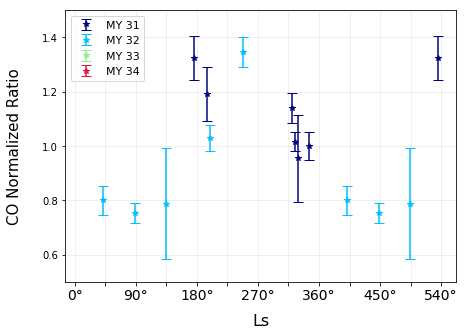

In [175]:
fig, axs = plt.subplots(1, 1, figsize= (7,5))
# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)

axs.errorbar(n31_x, CO_divided_ratio_31, yerr = CO_final_std_31, c = 'navy', fmt = '*', label = 'MY 31', capsize=5)
axs.errorbar(n32_x, CO_divided_ratio_32, yerr = CO_final_std_32, c = 'deepskyblue', fmt = '*', label = 'MY 32', capsize=5)
axs.errorbar(n33_x, CO_divided_ratio_33, yerr = CO_final_std_33, c = 'lightgreen', fmt = '*', label = 'MY 33', capsize=5)
axs.errorbar(n34_x, CO_divided_ratio_34, yerr = CO_final_std_34, c = 'crimson', fmt = '*', label = 'MY 34', capsize=5)
axs.legend(loc = "best", facecolor='white', framealpha=1, fontsize = 14)

#axs[0].set_ylim(1.2, 1.46)
#axs.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4])
#axs.set_yticklabels(['0','', '0.02', '', '0.04', '', '0.06', '', '0.08', '', '0.10', '', '0.12', '','0.14'], fontsize = 13)



axs.set_ylim(0.5, 1.5)
#axs.set_yticks([0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4])
#axs.set_yticklabels(['', '0.6', '', '0.8', '', '1.0', '', '1.2', '','1.4'], fontsize = 14)

#grid
axs.xaxis.grid(True, alpha = 0.25)
axs.yaxis.grid(True, alpha = 0.25)

#set up xsticks & their labels
axs.set_xticks(ls_sticks)
axs.set_xticklabels(n_x_label, fontsize = 14)

#axs.text(1.2, 1.25, "MY 31", color = 'navy', fontsize=12)
#plt.text(1.2, 1.3, "MY 32", color = 'deepskyblue', fontsize=12)
#plt.text(1.2, 1.35, "MY 33", color = 'lightgreen', fontsize=12)
#plt.text(1.2, 1.4, "MY 34", color = 'crimson', fontsize=12)


#plt.legend(facecolor='white', framealpha=1)
plt.legend(loc = 0, fontsize = 11)
#fig.legend(bbox_to_anchor=(1.4, 1), facecolor='white', framealpha=1, fontsize = 14)

plt.xlabel('Ls', labelpad = 10, fontsize = 16)
#axs[0].set_ylabel('N\N{SUBSCRIPT TWO} / Ar Ratio', labelpad = 20, fontsize = 16)
#axs[1].set_ylabel('O\N{SUBSCRIPT TWO} / Ar Ratio', labelpad = 20, fontsize = 16)
plt.ylabel('CO Normalized Ratio', labelpad = 20, fontsize = 15)
plt.show()


In [244]:
plt.cm.BuPu(n31_x)

array([[0.30196078, 0.        , 0.29411765, 1.        ],
       [0.30196078, 0.        , 0.29411765, 1.        ],
       [0.30196078, 0.        , 0.29411765, 1.        ],
       [0.30196078, 0.        , 0.29411765, 1.        ],
       [0.30196078, 0.        , 0.29411765, 1.        ],
       [0.30196078, 0.        , 0.29411765, 1.        ],
       [0.30196078, 0.        , 0.29411765, 1.        ]])

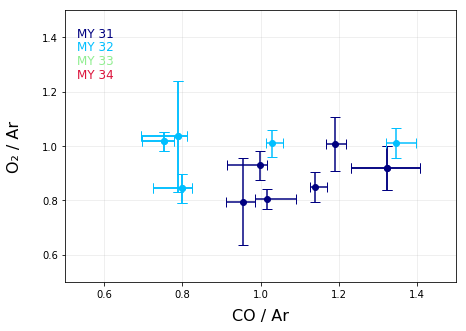

In [234]:
fig, axs = plt.subplots(1, 1, figsize= (7,5))
# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)


#axs[0].set_ylim(1.2, 1.46)
#axs.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4])
#axs.set_yticklabels(['0','', '0.02', '', '0.04', '', '0.06', '', '0.08', '', '0.10', '', '0.12', '','0.14'], fontsize = 13)

axs.errorbar(CO_divided_ratio_31, O2_divided_ratio_31, xerr = [O2_final_minus_31, O2_final_plus_31],  yerr = CO_final_std_31, c = 'navy', fmt = 'o', capsize=5)
axs.errorbar(CO_divided_ratio_32, O2_divided_ratio_32, xerr = [O2_final_minus_32, O2_final_plus_32],  yerr = CO_final_std_32, c = 'deepskyblue', fmt = 'o', capsize=5)
axs.errorbar(CO_divided_ratio_33, O2_divided_ratio_33, xerr = [O2_final_minus_33, O2_final_plus_33],  yerr = CO_final_std_33, c = 'lightgreen', fmt = 'o', capsize=5)
axs.errorbar(CO_divided_ratio_34, O2_divided_ratio_34, xerr = [O2_final_minus_34, O2_final_plus_34],  yerr = CO_final_std_34, c = 'crimson', fmt = 'o',capsize=5)
#axs.legend(loc = "best", facecolor='white', framealpha=1, fontsize = 14)

axs.errorbar([0,0], [0,0], xerr = [0.01, 0.2], c = 'navy', fmt = 'o',label = 'MY 31', capsize=5)

axs.set_xlim(0.5, 1.5)
axs.set_ylim(0.5, 1.5)
#axs.set_yticks([0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4])
#axs.set_yticklabels(['', '0.6', '', '0.8', '', '1.0', '', '1.2', '','1.4'], fontsize = 14)

#grid
axs.xaxis.grid(True, alpha = 0.25)
axs.yaxis.grid(True, alpha = 0.25)

#set up xsticks & their labels
#axs.set_xticks(ls_sticks)
#axs.set_xticklabels(n_x_label, fontsize = 14)
axs.text(0.53, 1.4, "MY 31", color = 'navy', fontsize=12)
plt.text(0.53, 1.35, "MY 32", color = 'deepskyblue', fontsize=12)
plt.text(0.53, 1.3, "MY 33", color = 'lightgreen', fontsize=12)
plt.text(0.53, 1.25, "MY 34", color = 'crimson', fontsize=12)



#plt.legend(facecolor='white', framealpha=1)
#plt.legend(loc = 0, fontsize = 11)
#fig.legend(bbox_to_anchor=(1.4, 1), facecolor='white', framealpha=1, fontsize = 14)

plt.xlabel('CO / Ar', labelpad = 10, fontsize = 16)
#axs[0].set_ylabel('N\N{SUBSCRIPT TWO} / Ar Ratio', labelpad = 20, fontsize = 16)
#axs[1].set_ylabel('O\N{SUBSCRIPT TWO} / Ar Ratio', labelpad = 20, fontsize = 16)
plt.ylabel('O\N{SUBSCRIPT TWO} / Ar', labelpad = 20, fontsize = 16)
plt.show()


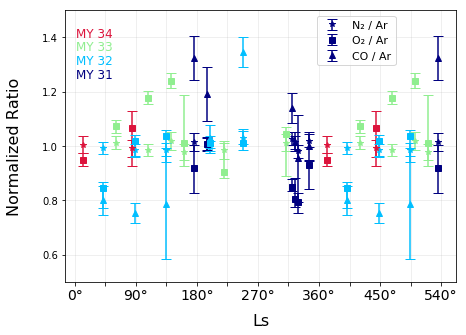

In [149]:
fig, axs = plt.subplots(1, 1, figsize= (7,5))
# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)

axs.errorbar(n31_x, N2_divided_ratio_31, yerr = N2_final_std_31, c = 'navy', fmt = '*', label = 'N\N{SUBSCRIPT TWO} / Ar', capsize=5)
axs.errorbar(n32_x, N2_divided_ratio_32, yerr = N2_final_std_32, c = 'deepskyblue', fmt = '*', capsize=5)
axs.errorbar(n33_x, N2_divided_ratio_33, yerr = N2_final_std_33, c = 'lightgreen', fmt = '*', capsize=5)
axs.errorbar(n34_x, N2_divided_ratio_34, yerr = N2_final_std_34, c = 'crimson', fmt = '*', capsize=5)
axs.legend(loc = "best", facecolor='white', framealpha=1, fontsize = 14)

#axs[0].set_ylim(1.2, 1.46)
#axs.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4])
#axs.set_yticklabels(['0','', '0.02', '', '0.04', '', '0.06', '', '0.08', '', '0.10', '', '0.12', '','0.14'], fontsize = 13)

axs.errorbar(n31_x, O2_divided_ratio_31, yerr = [O2_final_minus_31, O2_final_plus_31], c = 'navy', fmt = 's', label = 'O\N{SUBSCRIPT TWO} / Ar', capsize=5)
axs.errorbar(n32_x, O2_divided_ratio_32, yerr = [O2_final_minus_32, O2_final_plus_32], c = 'deepskyblue', fmt = 's', capsize=5)
axs.errorbar(n33_x, O2_divided_ratio_33, yerr = [O2_final_minus_33, O2_final_plus_33], c = 'lightgreen', fmt = 's', capsize=5)
axs.errorbar(n34_x, O2_divided_ratio_34, yerr = [O2_final_minus_34, O2_final_plus_34], c = 'crimson', fmt = 's', capsize=5)
#axs.legend(loc = "best", facecolor='white', framealpha=1, fontsize = 14)

axs.errorbar(n31_x, CO_divided_ratio_31, yerr = CO_final_std_31, c = 'navy', fmt = '^', label = 'CO / Ar', capsize=5)
axs.errorbar(n32_x, CO_divided_ratio_32, yerr = CO_final_std_32, c = 'deepskyblue', fmt = '^', capsize=5)
axs.errorbar(n33_x, CO_divided_ratio_33, yerr = CO_final_std_33, c = 'lightgreen', fmt = '^', capsize=5)
axs.errorbar(n34_x, CO_divided_ratio_34, yerr = CO_final_std_34, c = 'crimson', fmt = '^', capsize=5)

axs.set_ylim(0.5, 1.5)
#axs.set_yticks([0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4])
#axs.set_yticklabels(['', '0.6', '', '0.8', '', '1.0', '', '1.2', '','1.4'], fontsize = 14)

#grid
axs.xaxis.grid(True, alpha = 0.25)
axs.yaxis.grid(True, alpha = 0.25)

#set up xsticks & their labels
axs.set_xticks(ls_sticks)
axs.set_xticklabels(n_x_label, fontsize = 14)

axs.text(1.2, 1.25, "MY 31", color = 'navy', fontsize=12)
plt.text(1.2, 1.3, "MY 32", color = 'deepskyblue', fontsize=12)
plt.text(1.2, 1.35, "MY 33", color = 'lightgreen', fontsize=12)
plt.text(1.2, 1.4, "MY 34", color = 'crimson', fontsize=12)


#plt.legend(facecolor='white', framealpha=1)
plt.legend(bbox_to_anchor=(0.63, 1), fontsize = 11)
#fig.legend(bbox_to_anchor=(1.4, 1), facecolor='white', framealpha=1, fontsize = 14)

plt.xlabel('Ls', labelpad = 10, fontsize = 16)
#axs[0].set_ylabel('N\N{SUBSCRIPT TWO} / Ar Ratio', labelpad = 20, fontsize = 16)
#axs[1].set_ylabel('O\N{SUBSCRIPT TWO} / Ar Ratio', labelpad = 20, fontsize = 16)
plt.ylabel('Normalized Ratio', labelpad = 20, fontsize = 16)
plt.show()


### CHECK BOUND (data optimization)

In [421]:
largest(N2_divided_ratio, len(N2_divided_ratio))

1.0300245093197324

In [422]:
smallest(N2_divided_ratio, len(N2_divided_ratio))

0.9764678465087289

In [417]:
def largest(arr,n): 
  
    # Initialize maximum element 
    max = arr[0] 
  
    # Traverse array elements from second 
    # and compare every element with  
    # current max 
    for i in range(1, n): 
        if arr[i] > max: 
            max = arr[i] 
    return max
  
# Driver Code 
CO2_max = largest(CO2,len(CO2)) 
Ar_max = largest(Ar,len(Ar)) 
N2_max = largest(N2,len(N2)) 
O2_max = largest(O2,len(O2)) 
CO_max = largest(CO,len(CO)) 

def smallest(arr,n): 
  
    # Initialize maximum element 
    min = arr[0] 
  
    # Traverse array elements from second 
    # and compare every element with  
    # current max 
    for i in range(1, n): 
        if arr[i] < min: 
            min = arr[i] 
    return min
  
# Driver Code 
CO2_min = smallest(CO2,len(CO2)) 
Ar_min = smallest(Ar,len(Ar)) 
N2_min = smallest(N2,len(N2)) 
O2_min = smallest(O2,len(O2)) 
CO_min = smallest(CO,len(CO)) 

In [45]:
(CO2_max, CO2_min)

(0.954, 0.945)

In [46]:
(Ar_max, Ar_min)

(0.0226, 0.0185)

In [47]:
(N2_max, N2_min)

(0.0293, 0.025)

In [48]:
(O2_max, O2_min)

(0.00216, 0.00128)

In [49]:
(CO_max, CO_min)

(0.000813, 0.0)